In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rainfall-in-india/rainfall in india 1901-2015.csv
/kaggle/input/rainfall-in-india/district wise rainfall normal.csv


In [2]:
df1=pd.read_csv('/kaggle/input/rainfall-in-india/rainfall in india 1901-2015.csv')

In [3]:
df1

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [4]:
df2=pd.read_csv('/kaggle/input/rainfall-in-india/district wise rainfall normal.csv')

In [5]:
df2.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


<Axes: xlabel='DISTRICT'>

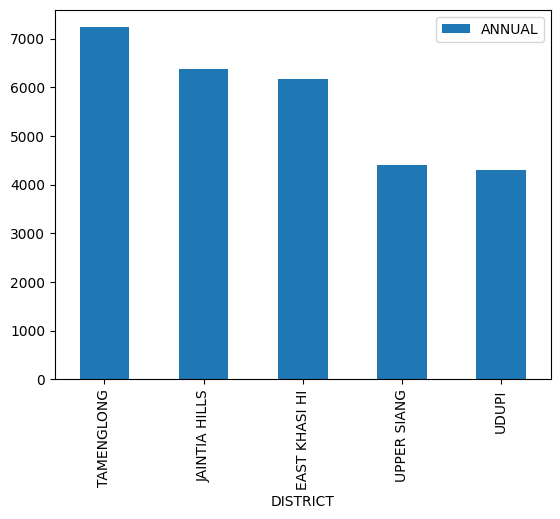

In [6]:
#Highest annual rainfall experiencing districts
df2.sort_values(by=['ANNUAL'],ascending=False).head(5).plot(kind='bar',x='DISTRICT',y='ANNUAL')

<Axes: xlabel='STATE_UT_NAME'>

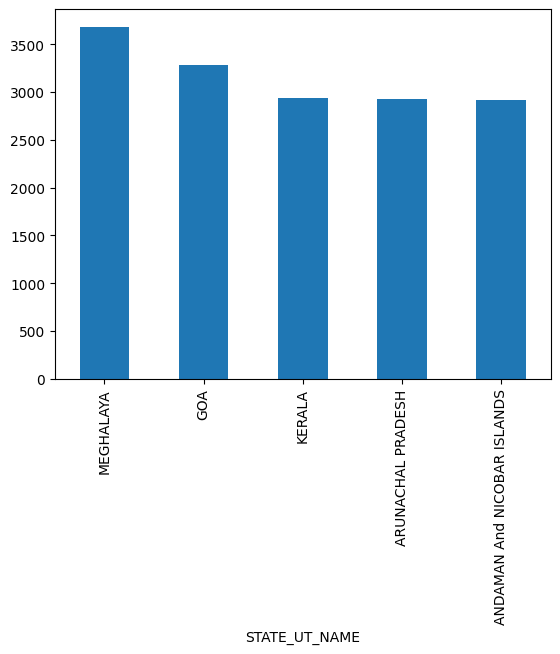

In [7]:
#Highest average rainfall experiencing states
df2.groupby(by='STATE_UT_NAME')['ANNUAL'].mean().sort_values(ascending=False).head().plot(kind='bar')

<Axes: xlabel='STATE_UT_NAME'>

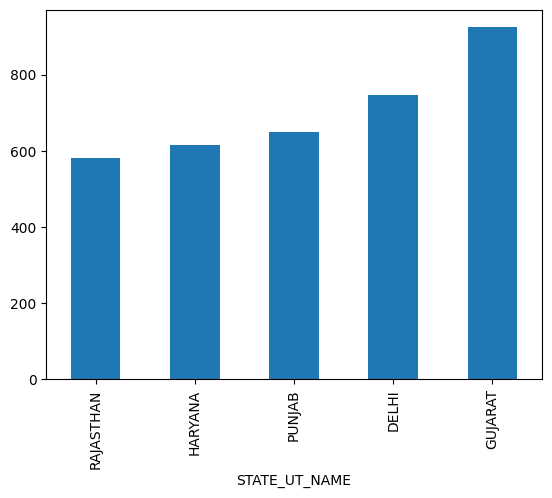

In [8]:
#Least average rainfall experiencing states in ascending order
df2.groupby(by='STATE_UT_NAME')['ANNUAL'].mean().sort_values(ascending=True).head().plot(kind='bar')

<Axes: >

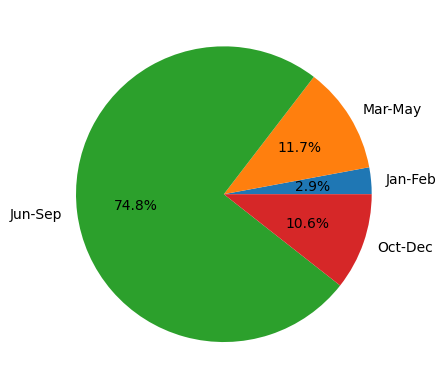

In [9]:
#Average rainfall in each quarter as percentage of average annual rain fall
df2[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']].mean().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='YEAR'>

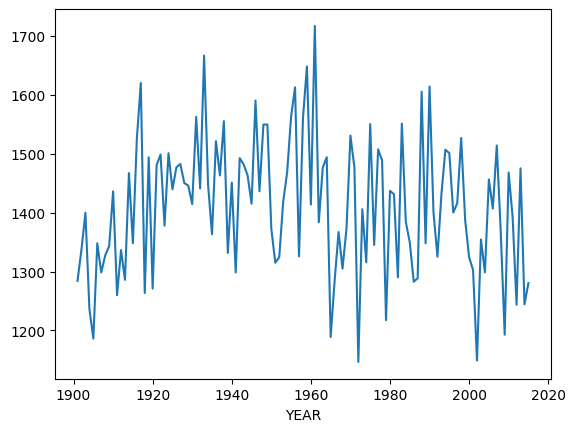

In [10]:
import matplotlib.pyplot as plt
df1.groupby(by='YEAR')['ANNUAL'].mean().plot(kind='line')


<Axes: >

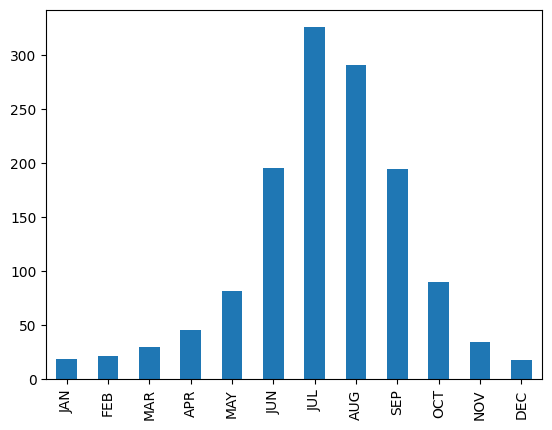

In [11]:
#Average rainfall month wise distribution
df2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind='bar')

In [12]:
df2.columns

Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [14]:
df2.groupby('STATE_UT_NAME')['ANNUAL'].describe()

,count,mean,std,min,25%,50%,75%,max
STATE_UT_NAME,,,,,,,,
ANDAMAN And NICOBAR ISLANDS,3.0,2911.400000,105.262861,2805.2,2859.250,2913.30,2964.500,3015.7
ANDHRA PRADESH,23.0,945.073913,176.259752,572.7,823.850,979.80,1100.450,1165.2
ARUNACHAL PRADESH,16.0,2927.375000,830.671666,1300.4,2385.900,3043.80,3435.525,4402.1
ASSAM,27.0,2454.359259,671.816245,1341.0,1885.600,2485.30,2929.250,3772.2
BIHAR,38.0,1200.555263,240.361103,874.4,1052.250,1141.15,1288.275,2090.6
CHANDIGARH,1.0,1070.600000,NaN,1070.6,1070.600,1070.60,1070.600,1070.6
CHATISGARH,18.0,1286.350000,138.729429,1029.3,1178.775,1292.85,1379.775,1544.4
DADAR NAGAR HAVELI,1.0,2374.100000,NaN,2374.1,2374.100,2374.10,2374.100,2374.1
DAMAN AND DUI,2.0,1535.700000,1185.676651,697.3,1116.500,1535.70,1954.900,2374.1
